In [1]:
import pandas as pd

omni = pd.read_excel('/Users/zoakes/Quant/Py_Review/Omni/Omni_Paper-2.xlsx')
omni

,Unnamed: 0,Omni Performance by Instrument,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,**Added 2 days in,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,DATE,ADBE-ROKU 8.20,APC-AMD 8.8+,CMG-BYND,COST,GOOGL,GS,KMI-CSCO,NFLX,PYPL,...,TSLA,NaN,TOTAL,Equity,NaN,Pos Size,Max DD + Error,Simult Pos,Capital Req,W/ 4x Margin
1,8.1.19,-526.47,94.01,277.5,645.58,1890.86,123.12,820.83,1809.7,619.53,...,4173.16,NaN,9477.35,9477.35,NaN,100000,5000,1,105000,26250
2,8.2.19,172.2,0,-731.01,0,1126.31,0,0,978.8,1274.99,...,1635.38,NaN,3542.67,13020,NaN,100000,5000,1,105000,26250
3,8.5.19,-505.44,-272.4,-503.04,525.29,-1.74,0,0,-220.32,1109.34,...,3142.8,NaN,136.35,13156.4,NaN,100000,5000,1,105000,26250
4,8.6.19,-350.49,13.78,-1109.4,1678.54,-537.2,-1031.67,452.15,717.5,0,...,467.78,NaN,3211.01,16367.4,NaN,100000,5000,2,210000,52500
5,8.7.19,-1077.65,0,0,1277.5,100.3,1036.94,151.8,2255.5,798.02,...,176.16,NaN,4427.52,20794.9,NaN,100000,5000,1,105000,26250
6,8.8.19,0,179.8,62.22,948.33,430.46,0,79.35,128.8,149.38,...,443.53,NaN,3440.91,24235.8,NaN,100000,5000,1,105000,26250
7,8.9.19,903.78,1528.23,151.28,500.5,-499.4,419.53,362.4,362.4,208.34,...,-325.66,NaN,4469.3,28705.1,NaN,100000,5000,2,210000,52500
8,8.12.19,0,116.76,548.37,501.16,-404.88,527.7,0,-170.66,966.71,...,426.55,NaN,2934.73,31639.8,NaN,100000,5000,3,315000,78750
9,8.13.19,-505.11,0,906.46,-117.65,2601.52,-261.94,0,502.22,257.83,...,2709.27,NaN,5311.57,36951.4,NaN,100000,5000,2,210000,52500


In [2]:
#Slice Relevant Rows + Columns
o = omni.iloc[1:23,0:16]

#Name the columns from spreadsheet
o.columns = ['date','roku','amd','bynd','cost','googl','gs','kmi','nflx','pypl','slb','teva','ual','lulu','intc','tsla']

'''
CAN ALSO DO---
pd.read_excel('path',skiprows=[0],usecols=[list_of_cols])
#Or
exclude_cols = ['tsla','apc','pypl']
pd.read_excel('path',usecols = lambda col: col not in exclude_cols)
'''

"\nCAN ALSO DO---\npd.read_excel('path',skiprows=[0],usecols=[list_of_cols])\n#Or\nexclude_cols = ['tsla','apc','pypl']\npd.read_excel('path',usecols = lambda col: col not in exclude_cols)\n"

In [3]:
o
o['date'].iloc[19] = '8.28.19' #Fix the asterisk

#Could also use a more complex loc call to remove any non dates using endswith() (see bottom cells)

df = o
df.head()
df.dtypes

date     object
roku     object
amd      object
bynd     object
cost     object
googl    object
gs       object
kmi      object
nflx     object
pypl     object
slb      object
teva     object
ual      object
lulu     object
intc     object
tsla     object
dtype: object

In [4]:
'''Convert Types -- first datetime'''
df['date']= pd.to_datetime(df['date'])
#datetime_index = o.set
df.dtypes

date     datetime64[ns]
roku             object
amd              object
bynd             object
cost             object
googl            object
gs               object
kmi              object
nflx             object
pypl             object
slb              object
teva             object
ual              object
lulu             object
intc             object
tsla             object
dtype: object

In [5]:
df.set_index('date',inplace=True)

#Alternate method 
#for col in df.columns:
#    s = df.col
#    df.col = pd.to_numeric(s, errors='ignore') #Can FORCE here

#-- if you need to SELECT certain columns to cast 
#col_filt = [col for col in df.columns if col not in ['date','time','sector','symbol','symbol_type']]
#for col in col_filt:
#    s = df.col
#    df.col = pd.to_numeric(s,errors='force')
  
#My prefered method -- cannot have datetime in col, set to index
df = df.astype(float)


In [6]:
df.dtypes

roku     float64
amd      float64
bynd     float64
cost     float64
googl    float64
gs       float64
kmi      float64
nflx     float64
pypl     float64
slb      float64
teva     float64
ual      float64
lulu     float64
intc     float64
tsla     float64
dtype: object

In [7]:
df.head()

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
2019-08-01,-526.47,94.01,277.50,645.58,1890.86,123.12,820.83,1809.70,619.53,1245.89,-743.46,1693.72,176.66,1349.88,4173.16
2019-08-02,172.20,0.00,-731.01,0.00,1126.31,0.00,0.00,978.80,1274.99,263.20,-767.22,0.00,730.84,494.56,1635.38
2019-08-05,-505.44,-272.40,-503.04,525.29,-1.74,0.00,0.00,-220.32,1109.34,488.24,-130.37,0.00,-353.21,0.00,3142.80
2019-08-06,-350.49,13.78,-1109.40,1678.54,-537.20,-1031.67,452.15,717.50,0.00,170.16,1405.60,841.56,1049.10,-88.62,467.78
2019-08-07,-1077.65,0.00,0.00,1277.50,100.30,1036.94,151.80,2255.50,798.02,0.00,867.00,26.66,-1249.42,64.71,176.16


In [8]:
'''Transform into RETURNS df -- WRONG way'''
rets = df.pct_change() # NOPE! (works if PRICES -- like Adj Close)
rets.head()

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-02,-1.327084,-1.000000,-3.634270,-1.000000,-0.404340,-1.000000,-1.000000,-0.459137,1.057996,-0.788745,0.031959,-1.000000,3.136986,-0.633627,-0.608120
2019-08-05,-3.935192,-inf,-0.311856,inf,-1.001545,NaN,NaN,-1.225092,-0.129923,0.855015,-0.830075,NaN,-1.483293,-1.000000,0.921755
2019-08-06,-0.306565,-1.050587,1.205391,2.195454,307.735632,-inf,inf,-4.256627,-1.000000,-0.651483,-11.781622,inf,-3.970188,-inf,-0.851158
2019-08-07,2.074695,-1.000000,-1.000000,-0.238922,-1.186709,-2.005108,-0.664271,2.143554,inf,-1.000000,-0.383182,-0.968321,-2.190945,-1.730196,-0.623413


In [9]:
returns = df.cumsum(axis=0).pct_change().fillna(0)
returns

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
2019-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-08-02,-0.327084,0.000000,-2.634270,0.000000,0.595660,0.000000,0.000000,0.540863,2.057996,0.211255,1.031959,0.000000,4.136986,0.366373,0.391880
2019-08-05,1.426708,-2.897564,1.109215,0.813671,-0.000577,0.000000,0.000000,-0.079010,0.585552,0.323533,0.086299,0.000000,-0.389212,0.000000,0.541065
2019-08-06,0.407684,-0.077246,1.159793,1.433584,-0.178150,-8.379386,0.550845,0.279381,0.000000,0.085194,-0.856525,0.496871,1.892692,-0.048047,0.052258
2019-08-07,0.890473,0.000000,0.000000,0.448338,0.040472,-1.141313,0.119248,0.686464,0.265665,0.000000,-3.682310,0.010516,-0.779236,0.036855,0.018702
2019-08-08,0.000000,-1.092279,-0.030117,0.229792,0.166940,0.000000,0.055693,0.023244,0.039291,0.013693,0.415882,0.031203,0.980676,0.164589,0.046224
2019-08-09,-0.395035,100.607637,-0.075499,0.098616,-0.165969,3.267622,0.240937,0.063916,0.052727,-0.097098,-0.157280,0.000000,0.678191,0.347331,-0.032440
2019-08-12,0.000000,0.075650,-0.296024,0.089882,-0.161333,0.963097,0.000000,-0.028291,0.232405,0.221012,-0.943787,-0.006700,0.606393,0.000000,0.043915
2019-08-13,0.364945,0.000000,-0.695095,-0.019360,1.236047,-0.243525,0.000000,0.085678,0.050295,0.106441,9.817753,-0.172747,-0.665644,0.089856,0.267194


In [11]:
#Lets look at cum_sum, which allows PNLs to be reconstructed into prices & log returns here.
#We're taking the sum of rows values up to that row... so rows with 0 will apply a front fill
import numpy as np
cum_sum = df.cumsum(axis=0)
cum_sum.head()


,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
2019-08-01,-526.47,94.01,277.50,645.58,1890.86,123.12,820.83,1809.70,619.53,1245.89,-743.46,1693.72,176.66,1349.88,4173.16
2019-08-02,-354.27,94.01,-453.51,645.58,3017.17,123.12,820.83,2788.50,1894.52,1509.09,-1510.68,1693.72,907.50,1844.44,5808.54
2019-08-05,-859.71,-178.39,-956.55,1170.87,3015.43,123.12,820.83,2568.18,3003.86,1997.33,-1641.05,1693.72,554.29,1844.44,8951.34
2019-08-06,-1210.20,-164.61,-2065.95,2849.41,2478.23,-908.55,1272.98,3285.68,3003.86,2167.49,-235.45,2535.28,1603.39,1755.82,9419.12
2019-08-07,-2287.85,-164.61,-2065.95,4126.91,2578.53,128.39,1424.78,5541.18,3801.88,2167.49,631.55,2561.94,353.97,1820.53,9595.28


In [12]:
'''Log Returns -- for calcs like Corr & Covar'''
cs = cum_sum + 10000 #(Add an initial value -- makes these PRICES or EQUITY )
print(cs)
for col in cs.columns:
    cs[col] = (np.log(cs[col]) - np.log(cs[col].shift(1))).fillna(0)

log_rets = cs
log_rets.head()

                roku       amd      bynd      cost     googl        gs  \
date                                                                     
2019-08-01   9473.53  10094.01  10277.50  10645.58  11890.86  10123.12   
2019-08-02   9645.73  10094.01   9546.49  10645.58  13017.17  10123.12   
2019-08-05   9140.29   9821.61   9043.45  11170.87  13015.43  10123.12   
2019-08-06   8789.80   9835.39   7934.05  12849.41  12478.23   9091.45   
2019-08-07   7712.15   9835.39   7934.05  14126.91  12578.53  10128.39   
2019-08-08   7712.15  10015.19   7996.27  15075.24  13008.99  10128.39   
2019-08-09   8615.93  11543.42   8147.55  15575.74  12509.59  10547.92   
2019-08-12   8615.93  11660.18   8695.92  16076.90  12104.71  11075.62   
2019-08-13   8110.82  11660.18   9602.38  15959.25  14706.23  10813.68   
2019-08-14   8515.63  17540.37   9602.38  15451.25  17039.59  10808.57   
2019-08-15   8877.15  17808.65   9602.38  17177.18  18004.33  10808.57   
2019-08-16   9538.55  19158.24   9602.

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
date,,,,,,,,,,,,,,,
2019-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-08-02,0.018014,0.000000,-0.073783,0.000000,0.090499,0.000000,0.000000,0.079625,0.113383,0.023134,-0.086521,0.000000,0.069354,0.042651,0.109200
2019-08-05,-0.053823,-0.027357,-0.054133,0.048165,-0.000134,0.000000,0.000000,-0.017378,0.089168,0.041547,-0.015476,0.000000,-0.032918,0.000000,0.181324
2019-08-06,-0.039100,0.001402,-0.130877,0.139988,-0.042150,-0.107488,0.040936,0.055519,0.000000,0.014084,0.155426,0.069495,0.094765,-0.007510,0.024384
2019-08-07,-0.130795,0.000000,0.000000,0.094784,0.008006,0.108008,0.013376,0.156807,0.059559,0.000000,0.085068,0.002125,-0.113927,0.005489,0.009031


In [13]:
'''Aggregate Datatype measures'''
log_rets.describe()
log_rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2019-08-01 to 2019-08-30
Data columns (total 15 columns):
roku     22 non-null float64
amd      22 non-null float64
bynd     22 non-null float64
cost     22 non-null float64
googl    22 non-null float64
gs       22 non-null float64
kmi      22 non-null float64
nflx     22 non-null float64
pypl     22 non-null float64
slb      22 non-null float64
teva     22 non-null float64
ual      22 non-null float64
lulu     22 non-null float64
intc     22 non-null float64
tsla     22 non-null float64
dtypes: float64(15)
memory usage: 2.8 KB


In [14]:
'''CHECK FOR NA VALUES -- Already fillna()'''
log_rets.isna().sum()

roku     0
amd      0
bynd     0
cost     0
googl    0
gs       0
kmi      0
nflx     0
pypl     0
slb      0
teva     0
ual      0
lulu     0
intc     0
tsla     0
dtype: int64

In [21]:
'''Bonus -- Correlation matrix'''
corr = log_rets.corr()
corr

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla
roku,1.000000,0.220103,0.098707,-0.339922,-0.024528,0.027707,-0.065578,-0.282144,-0.202642,-0.277860,0.033354,-0.065617,0.253862,0.150040,-0.140914
amd,0.220103,1.000000,-0.120689,-0.313375,0.256577,0.050787,0.272176,-0.175777,0.013681,-0.148804,-0.030499,0.020569,-0.011060,0.309206,-0.205534
bynd,0.098707,-0.120689,1.000000,-0.403467,0.158278,0.189530,-0.536751,-0.076324,-0.139607,-0.120271,-0.227487,0.218676,-0.054510,-0.452764,-0.077439
cost,-0.339922,-0.313375,-0.403467,1.000000,-0.481795,-0.200626,0.187863,0.165689,-0.251038,-0.019781,0.466245,0.335063,0.165329,0.048532,-0.182453
googl,-0.024528,0.256577,0.158278,-0.481795,1.000000,-0.131179,-0.067334,0.030628,-0.025259,0.014276,-0.086642,-0.142522,-0.307218,0.169441,0.470422
gs,0.027707,0.050787,0.189530,-0.200626,-0.131179,1.000000,-0.017861,0.181434,0.206200,-0.072201,-0.141551,-0.364311,-0.354277,0.132802,-0.158179
kmi,-0.065578,0.272176,-0.536751,0.187863,-0.067334,-0.017861,1.000000,0.251156,0.007050,0.192146,0.487668,-0.349945,0.075289,0.324418,0.022332
nflx,-0.282144,-0.175777,-0.076324,0.165689,0.030628,0.181434,0.251156,1.000000,0.275288,0.067841,0.368801,-0.041468,-0.143063,0.056569,-0.024530
pypl,-0.202642,0.013681,-0.139607,-0.251038,-0.025259,0.206200,0.007050,0.275288,1.000000,0.000844,-0.251968,-0.367894,-0.087629,0.067042,0.385757
slb,-0.277860,-0.148804,-0.120271,-0.019781,0.014276,-0.072201,0.192146,0.067841,0.000844,1.000000,-0.002692,0.154556,-0.206671,-0.172341,0.264476


In [25]:
'''Bonus 2'''
average_corrs = corr.mean()
average_corrs

roku     0.025638
amd      0.075824
bynd    -0.036275
cost     0.011751
googl    0.055543
gs       0.023218
kmi      0.118842
nflx     0.110273
pypl     0.041988
slb      0.044901
teva     0.123550
ual      0.011380
lulu     0.026955
intc     0.102288
tsla     0.059466
dtype: float64

In [47]:
'''Bonus Continued'''
min_corr = corr.min() #.min() #To find outright minimum
first_inst = min_corr.sort_values().head(1).index #To include Index (ticker in series) (Find first value -- bynd)

abs_min = corr.min().min()

instrument = corr.loc[corr['bynd'] == abs_min].index
print(f'Min Correlation (Pair) is {first_inst[0]} x {instrument[0]} -- {round(abs_min,6)}')

Min Correlation (Pair) is bynd x kmi -- -0.536751


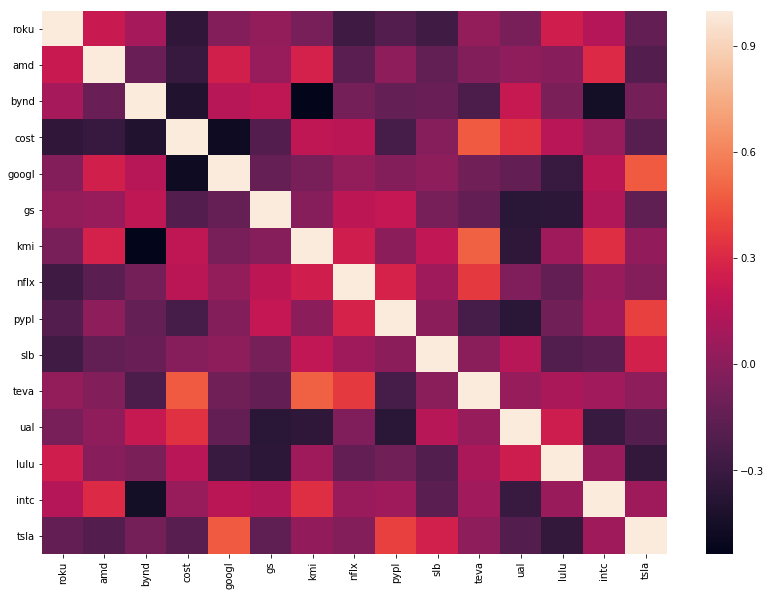

In [20]:
'''Bonus Final'''
import seaborn as sns
ax = sns.heatmap(corr)
ax.figure.set_size_inches(14,10)

In [15]:
'''More complex operations -- '''

#To manipulate values in loop --
for i in df.itertuples():
    #print(i)
    print(i.nflx)
    

#Manipulating by loc

oct_1 = df.loc['2019-08-01'] #Oct 1st row
print('October 1\n',oct_1)

roku_wins = df.loc[df['roku'] > 0.0]  #All positive Roku days
print('DF when Roku wins \n',roku_wins)


#Can combine these
tsla_roku_roku_wins = df.loc[df['roku'] > 0, ['tsla','roku']]
print('Tesla and Roku on Roku winning days\n',tsla_roku_roku_wins)


filter_col = [col for col in df if col.startswith('r')]
oct5_10_r_stocks = df.loc['2019-08-05' : '2019-08-10',filter_col]

1809.7
978.8
-220.32
717.5
2255.5
128.8
362.4
-170.66
502.22
0.0
-783.07
257.89
-690.49
163.17
-44.06
379.18
503.25
430.67
848.31
639.19
90.18
340.76
October 1
 roku     -526.47
amd        94.01
bynd      277.50
cost      645.58
googl    1890.86
gs        123.12
kmi       820.83
nflx     1809.70
pypl      619.53
slb      1245.89
teva     -743.46
ual      1693.72
lulu      176.66
intc     1349.88
tsla     4173.16
Name: 2019-08-01 00:00:00, dtype: float64
DF when Roku wins 
                roku      amd     bynd     cost    googl      gs     kmi  \
date                                                                      
2019-08-02   172.20     0.00  -731.01     0.00  1126.31    0.00    0.00   
2019-08-09   903.78  1528.23   151.28   500.50  -499.40  419.53  362.40   
2019-08-14   404.81  5880.19     0.00  -508.00  2333.36   -5.11  297.20   
2019-08-15   361.52   268.28     0.00  1725.93   964.74    0.00 -505.26   
2019-08-16   661.40  1349.59     0.00   540.20   154.56  667.34  401.70 

In [16]:
'''Can also be used for assignment ---'''
#Make a copy -- as to not change df
df2 = df

#Sometimes need to initialize the column FIRST,
df2['tsla_roku'] = 0  
#Then can assign via loc
df2.loc[(df2['roku'] > 0) & (df2['tsla'] > 0), ['tsla_roku']] = 'Both WIN!'
df2

df2.loc[df2['tsla_roku'] != 0]

,roku,amd,bynd,cost,googl,gs,kmi,nflx,pypl,slb,teva,ual,lulu,intc,tsla,tsla_roku
date,,,,,,,,,,,,,,,,
2019-08-02,172.20,0.00,-731.01,0.00,1126.31,0.00,0.00,978.80,1274.99,263.20,-767.22,0.00,730.84,494.56,1635.38,Both WIN!
2019-08-14,404.81,5880.19,0.00,-508.00,2333.36,-5.11,297.20,0.00,581.22,0.00,0.00,354.96,66.10,221.11,808.30,Both WIN!
2019-08-15,361.52,268.28,0.00,1725.93,964.74,0.00,-505.26,-783.07,-878.18,0.00,-800.59,1003.02,-164.24,261.60,741.27,Both WIN!
2019-08-16,661.40,1349.59,0.00,540.20,154.56,667.34,401.70,257.89,362.79,61.54,1273.84,-84.22,-509.40,301.54,2327.18,Both WIN!
2019-08-21,593.64,606.57,114.95,633.36,180.11,392.28,391.72,-44.06,350.76,-89.03,0.00,-668.56,587.88,-42.32,51.31,Both WIN!
2019-08-22,356.45,-505.18,5449.18,-233.30,653.13,157.76,-589.11,379.18,187.45,0.00,-505.11,1117.67,410.38,-467.33,985.69,Both WIN!
2019-08-23,972.68,0.00,368.64,94.38,1433.13,134.46,0.00,503.25,949.63,0.00,0.00,484.87,15.87,0.00,1946.72,Both WIN!
2019-08-26,3053.47,229.89,437.58,-363.20,1336.20,356.56,0.00,430.67,-93.93,-31.07,418.08,-286.70,-5.47,66.21,2005.35,Both WIN!
2019-08-27,1597.86,699.73,50.47,1940.99,149.17,-28.24,100.14,848.31,176.98,0.00,4003.61,467.11,1065.38,305.52,967.71,Both WIN!


In [52]:
'''Rows where T'''
filter_m_z = [col for col in df if col[0] >= 'm'] # ** Watch out for case -- uppercase and lowercase have different order
df2.loc[(df2['roku'] > 0) & (df2['tsla'] < 0),filter_m_z]

,roku,nflx,pypl,slb,teva,ual,tsla,tsla_roku
date,,,,,,,,
2019-08-09,903.78,362.40,208.34,-213.34,-140.64,0.0,-325.66,0
2019-08-20,816.99,163.17,1175.61,-233.86,-966.85,171.6,-536.85,0
